## **Getting started with MultiVariate Regression in Python**

---

In [25]:
#I hope all of you know fundamentals of programming and basics of python

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Assessing the Dataset**

---

In [26]:
data = 'https://raw.githubusercontent.com/github-goog/colab/main/multivariate_regression_dataset.csv'

dataset = pd.read_csv(data)

In [27]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [29]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# **Identifying necessary variables**

Visualizing correlation between features using heatmap --> 


AxesSubplot(0.125,0.125;0.62x0.755)


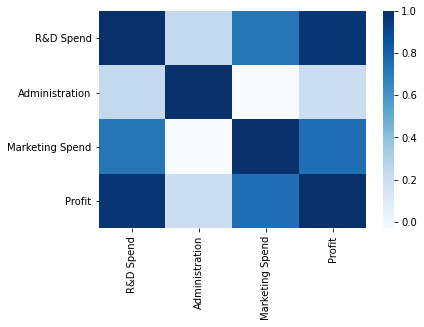

In [30]:
# Understanding correlation among columns

print("Visualizing correlation between features using heatmap -->", "\n"*2)

temp_plot = sns.heatmap(dataset.corr(method='pearson'), cmap='Blues')
print(temp_plot)

# **Engineering the data**

In [31]:
x = dataset[["R&D Spend", "Administration", "Marketing Spend"]]
y = dataset[["Profit"]]

In [32]:
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [33]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [35]:
x_train

,R&D Spend,Administration,Marketing Spend
32,63408.86,129219.61,46085.25
39,38558.51,82982.09,174999.30
21,78389.47,153773.43,299737.29
36,28663.76,127056.21,201126.82
19,86419.70,153514.11,0.00
42,23640.93,96189.63,148001.11
49,0.00,116983.80,45173.06
26,75328.87,144135.98,134050.07
22,73994.56,122782.75,303319.26
13,91992.39,135495.07,252664.93


In [36]:
x_test

,R&D Spend,Administration,Marketing Spend
27,72107.60,127864.55,353183.81
35,46014.02,85047.44,205517.64
40,28754.33,118546.05,172795.67
38,20229.59,65947.93,185265.10
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
48,542.05,51743.15,0.00
29,65605.48,153032.06,107138.38
46,1315.46,115816.21,297114.46
31,61136.38,152701.92,88218.23


In [37]:
y_train

,Profit
32,97427.84
39,81005.76
21,111313.02
36,90708.19
19,122776.86
42,71498.49
49,14681.40
26,105733.54
22,110352.25
13,134307.35


In [38]:
y_test

,Profit
27,105008.31
35,96479.51
40,78239.91
38,81229.06
2,191050.39
3,182901.99
48,35673.41
29,101004.64
46,49490.75
31,97483.56


# **Performing Regression**

In [39]:
regressor = LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Predicting Test Values**

In [40]:
y_pred = regressor.predict(x_test)

In [41]:
y_pred

array([[114729.00768236],
       [ 90569.03231312],
       [ 75952.34861633],
       [ 70179.81117586],
       [179539.15187896],
       [171638.15637459],
       [ 49624.94193162],
       [102253.12475568],
       [ 58381.67907   ],
       [ 98240.74724733]])

In [42]:
y_test

,Profit
27,105008.31
35,96479.51
40,78239.91
38,81229.06
2,191050.39
3,182901.99
48,35673.41
29,101004.64
46,49490.75
31,97483.56


# **Evaluating model**

In [43]:
mse = mean_squared_error(y_pred,y_test)

print("Mean Square Error : ", mse)

Mean Square Error :  79195300.728072


In [44]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Square Error : ", rmse)

Root Mean Square Error :  8899.174159891018


In [45]:
r2 = r2_score(y_test, y_pred)

print("R2 Score : ", r2)

R2 Score :  0.9650940934427324


# **Visualizing model**

Multi-Dimensioanl Visualization of original data --> 


Axes3DSubplot(0.125,0.125;0.775x0.755)


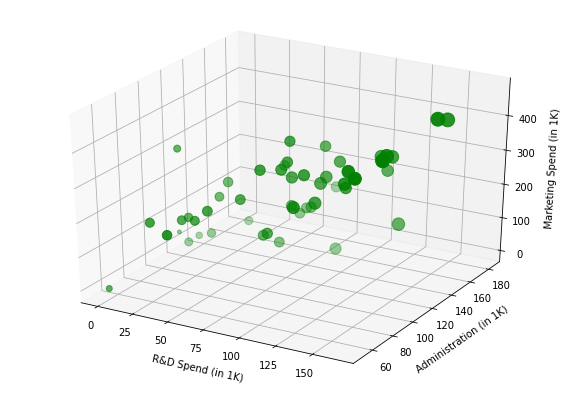

In [46]:
var_1 = []
var_2 = []
var_3 = []
var_4 = []

for i in range(len(x)):
  var_1.append(x["R&D Spend"][i]/1000)

for j in range(len(x)):
  var_2.append(x["Administration"][j]/1000)

for k in range(len(x)):
  var_3.append(x["Marketing Spend"][k]/1000)

for l in range(len(y)):
  var_4.append(y["Profit"][l]/1000)

print("Multi-Dimensioanl Visualization of original data -->", "\n"*2)

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection ='3d')
ax.scatter(var_1, var_2, var_3, s = var_4, c="green")
ax.set_xlabel('\n R&D Spend (in 1K)')
ax.set_ylabel('\n Administration (in 1K)')
ax.set_zlabel('\n Marketing Spend (in 1K)')

print(ax)


Multi-Dimensioanl Visualization of train data --> 


Axes3DSubplot(0.125,0.125;0.775x0.755)


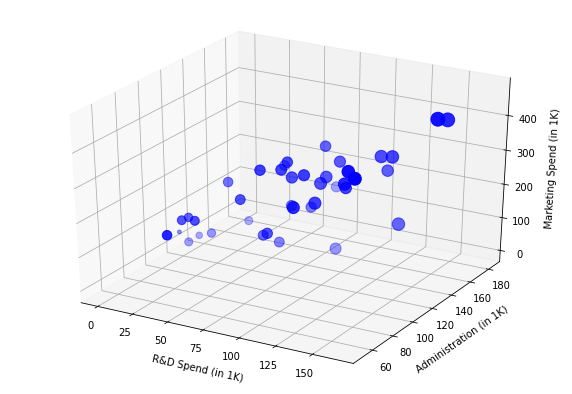

In [47]:
var_11 = []
var_12 = []
var_13 = []
var_14 = []

for i in x_train["R&D Spend"]:
  var_11.append(i/1000)

for j in x_train["Administration"]:
  var_12.append(j/1000)

for k in x_train["Marketing Spend"]:
  var_13.append(k/1000)

for l in y_train["Profit"]:
  var_14.append(l/1000)

print("Multi-Dimensioanl Visualization of train data -->", "\n"*2)

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection ='3d')
ax.scatter(var_11, var_12, var_13, s = var_14, c="blue")
ax.set_xlabel('\n R&D Spend (in 1K)')
ax.set_ylabel('\n Administration (in 1K)')
ax.set_zlabel('\n Marketing Spend (in 1K)')

print(ax)

# ax.view_init(45, 0)

Multi-Dimensioanl Visualization of original test data --> 


Axes3DSubplot(0.125,0.125;0.775x0.755)


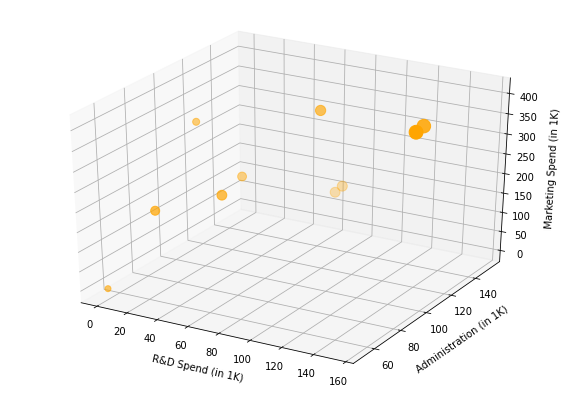

In [48]:
var_21 = []
var_22 = []
var_23 = []
var_24 = []

for i in x_test["R&D Spend"]:
  var_21.append(i/1000)

for j in x_test["Administration"]:
  var_22.append(j/1000)

for k in x_test["Marketing Spend"]:
  var_23.append(k/1000)

for l in y_test["Profit"]:
  var_24.append(l/1000)

print("Multi-Dimensioanl Visualization of original test data -->", "\n"*2)

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection ='3d')
ax.scatter(var_21, var_22, var_23, s = var_24, c="orange")
ax.set_xlabel('\n R&D Spend (in 1K)')
ax.set_ylabel('\n Administration (in 1K)')
ax.set_zlabel('\n Marketing Spend (in 1K)')

print(ax)

# ax.view_init(45, 0)

Multi-Dimensioanl Visualization of predicted values --> 


Axes3DSubplot(0.125,0.125;0.775x0.755)


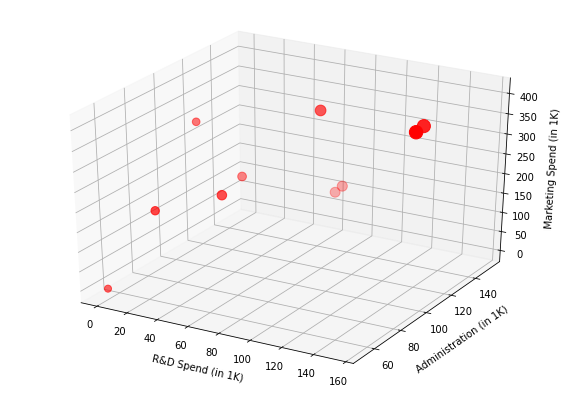

In [49]:
var_31 = []
var_32 = []
var_33 = []
var_34 = []

for i in x_test["R&D Spend"]:
  var_31.append(i/1000)

for j in x_test["Administration"]:
  var_32.append(j/1000)

for k in x_test["Marketing Spend"]:
  var_33.append(k/1000)

for l in range(len(y_pred)):
  var_34.append(int(y_pred[l])/1000)

print("Multi-Dimensioanl Visualization of predicted values -->", "\n"*2)

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection ='3d')
ax.scatter(var_31, var_32, var_33, s = var_34, c="red")
ax.set_xlabel('\n R&D Spend (in 1K)')
ax.set_ylabel('\n Administration (in 1K)')
ax.set_zlabel('\n Marketing Spend (in 1K)')

print(ax)

# ax.view_init(45, 0)

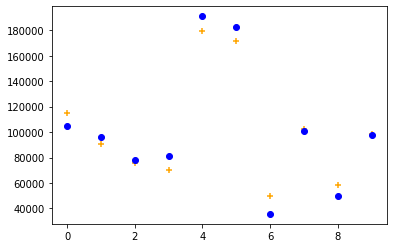

In [50]:
original_values = y_test.to_numpy()
predicted_values = y_pred

list_values = []
for i in range(len(original_values)):
  list_values.append(i)

plt.scatter(list_values, predicted_values, marker="+", color = 'orange')
plt.scatter(list_values, original_values, color = 'blue')

# **Custom Prediction**

In [51]:
custom_R_D = 10000
custom_Administration = 65000
custom_Marketing = 4000

custom_pred = regressor.predict([[custom_R_D, custom_Administration, custom_Marketing]])

print("Profit for custom aforementioned values : ", round(custom_pred[0][0]))

Profit for custom aforementioned values :  56948


# **Thank you!**

---